In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [178]:
data_url = 'https://raw.githubusercontent.com/Customer-Churn-Prediction/Project-Machine-Learning/master/Churning.csv'
data = pd.read_csv(data_url)
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [179]:
#sel = data[data.State=='AL'][data.Churn==1]
sel = data.query('State=="AL" & Churn==1')
sel

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
332,86,0,128.3,197.1,138.4,12.2,7,1,0,0,...,21.81,93,16.75,152,6.23,5,3.29,AL,415,380-3437
491,55,0,191.9,256.1,203.7,14.3,1,1,1,0,...,32.62,110,21.77,101,9.17,6,3.86,AL,415,375-2975
514,60,29,265.9,215.8,108.1,14.0,0,1,1,1,...,45.20,94,18.34,82,4.86,12,3.78,AL,408,411-7778
859,93,0,267.9,223.0,262.7,11.3,3,1,0,0,...,45.54,74,18.96,90,11.82,3,3.05,AL,408,374-9203
1662,197,0,127.3,222.3,173.9,13.7,5,1,1,0,...,21.64,115,18.90,95,7.83,5,3.70,AL,415,395-7923
2155,172,0,270.0,256.6,168.5,12.0,2,1,0,0,...,45.90,111,21.81,104,7.58,5,3.24,AL,408,359-5731
2595,25,0,264.9,281.2,166.1,8.4,1,1,0,0,...,45.03,66,23.90,80,7.47,4,2.27,AL,408,337-4600
2827,89,0,129.2,214.1,214.9,10.3,5,1,0,0,...,21.96,68,18.20,100,9.67,4,2.78,AL,510,347-2016


In [180]:
State_Churn=data.query('Churn==1').groupby(['State']).size()

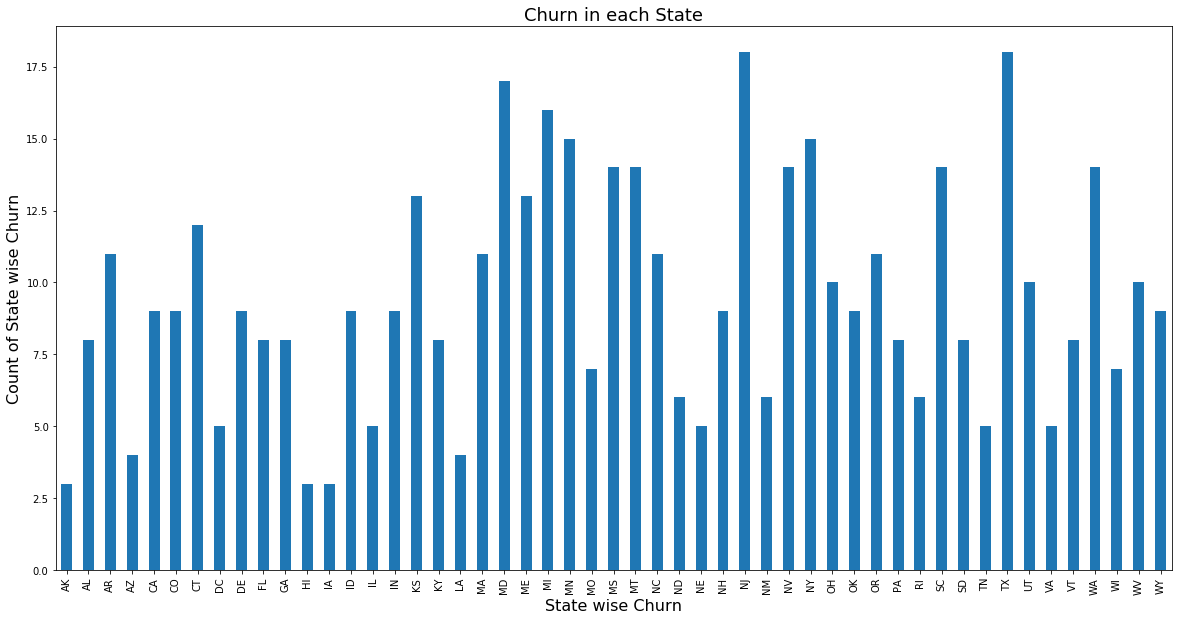

In [181]:
State_Churn.plot(kind='bar', figsize=(20,10))
plt.title('Churn in each State', fontsize=18)
plt.xlabel('State wise Churn', fontsize=16)
plt.ylabel('Count of State wise Churn', fontsize=16)
plt.show()

In [182]:
target = np.array(data.Churn)
data = data.drop(['Churn', 'Phone'], axis=1)
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415


In [183]:
train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3, random_state=42)                                            

In [184]:
print(len(test_x))
print(len(train_x))

1000
2333


In [185]:
features = data.columns[:17]
len(features)

17

In [186]:
clf = RandomForestClassifier(n_jobs = -1)
clf.fit(train_x[features], train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [187]:
pred = clf.predict(test_x[features])
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0,

In [188]:
proba = clf.predict_proba(test_x[features])
proba

array([[ 0.8,  0.2],
       [ 1. ,  0. ],
       [ 0.2,  0.8],
       ..., 
       [ 1. ,  0. ],
       [ 0.8,  0.2],
       [ 0.9,  0.1]])

In [189]:
cnf_mat = confusion_matrix(test_y, pred)
cnf_mat

array([[853,   4],
       [ 54,  89]], dtype=int64)

In [190]:
pd.crosstab(test_y, pred, rownames=['Actual Churn'], colnames=['Predicted Churn'])

Predicted Churn,0,1
Actual Churn,,
0,853,4
1,54,89


In [191]:
list(zip(train_x[features], clf.feature_importances_))

[('Account Length', 0.031425715413587907),
 ('VMail Message', 0.019899683178594287),
 ('Day Mins', 0.17003542269217323),
 ('Eve Mins', 0.062972042862729324),
 ('Night Mins', 0.041156586848646995),
 ('Intl Mins', 0.043194355138040263),
 ('CustServ Calls', 0.11441433990345548),
 ("Int'l Plan", 0.079618686383877021),
 ('VMail Plan', 0.025468131888183358),
 ('Day Calls', 0.040865049080388377),
 ('Day Charge', 0.10217083527752177),
 ('Eve Calls', 0.036513773622109461),
 ('Eve Charge', 0.066944618374616655),
 ('Night Calls', 0.034173420380321909),
 ('Night Charge', 0.037669925054538422),
 ('Intl Calls', 0.042739340217572745),
 ('Intl Charge', 0.050738073683642707)]

,importance,labels
2,0.170035,Day Mins
6,0.114414,CustServ Calls
10,0.102171,Day Charge
7,0.079619,Int'l Plan
12,0.066945,Eve Charge


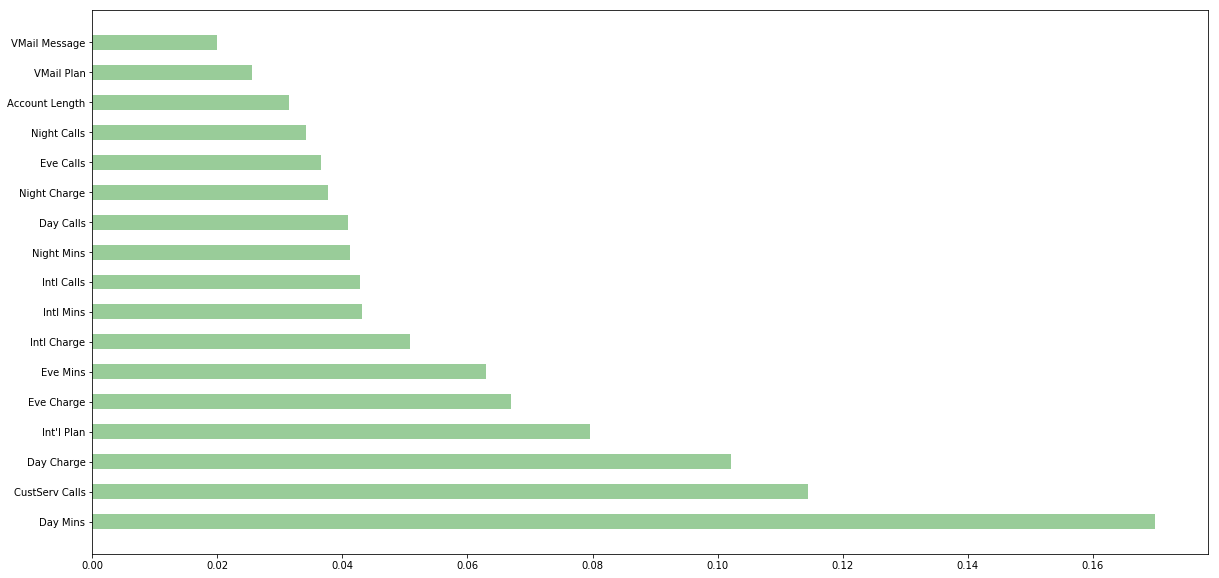

In [192]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head())

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='g', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

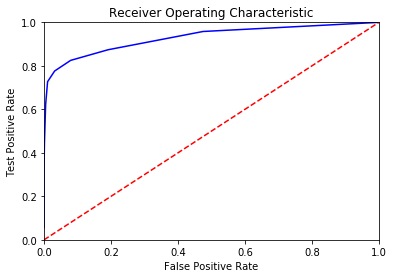

In [193]:
fpr, tpr, threshold = roc_curve(test_y, proba[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('Test Positive Rate')
plt.show()